In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("hyd_v2.csv")

In [3]:
data.columns

Index(['active', 'amenities', 'balconies', 'bathroom', 'combineDescription',
       'completeStreetName', 'deposit', 'facing', 'facingDesc', 'floor',
       'furnishingDesc', 'gym', 'id', 'isMaintenance', 'lift', 'loanAvailable',
       'locality', 'localityId', 'location', 'maintenanceAmount', 'ownerName',
       'parking', 'parkingDesc', 'propertyTitle', 'propertyType',
       'property_age', 'property_size', 'reactivationSource', 'rent_amount',
       'sharedAccomodation', 'shortUrl', 'swimmingPool', 'totalFloor',
       'type_bhk', 'waterSupply', 'weight'],
      dtype='object')

In [4]:
data=data.drop(['combineDescription','weight','id','localityId','shortUrl','propertyTitle','amenities','location','propertyType','reactivationSource','facingDesc','ownerName','completeStreetName','parkingDesc','loanAvailable','active','sharedAccomodation'],axis=1)

In [5]:
data=data[(data['property_age']>-1) & (data['property_age']<15)]
data['condition']=np.nan
data.loc[data['property_age'] == 0, 'condition'] = data.loc[data['property_age'] == 0, 'condition'].fillna('0')
data.loc[data['property_age'] <= 5, 'condition'] = data.loc[data['property_age'] <= 5, 'condition'].fillna('1-5')
data.loc[data['property_age'] > 5, 'condition'] = data.loc[data['property_age'] > 5, 'condition'].fillna('5+')

In [6]:
data=data.drop(['property_age'],axis=1)


In [7]:
data.rename(columns={'condition': 'property_age'}, inplace=True)

In [8]:
data['Balcony']=np.nan
data.loc[data['balconies'] == "None", 'Balcony'] = data.loc[data['balconies'] == "None", 'Balcony'].fillna('0')
data["balconies"].replace({"None": -1}, inplace=True)
data['balconies']=data['balconies'].astype(int)
data=data[data['balconies']<10]
data.loc[data['balconies'] == 0, 'Balcony'] = data.loc[data['balconies'] == 0, 'Balcony'].fillna('0')
data.loc[data['balconies'] == 5, 'Balcony'] = data.loc[data['balconies'] == 5, 'Balcony'].fillna('4+')
data.loc[data['balconies'] == 6, 'Balcony'] = data.loc[data['balconies'] == 6, 'Balcony'].fillna('4+')
data.loc[data['balconies'] == 1, 'Balcony'] = data.loc[data['balconies'] == 1, 'Balcony'].fillna('1')
data.loc[data['balconies'] == 2, 'Balcony'] = data.loc[data['balconies'] == 2, 'Balcony'].fillna('2')
data.loc[data['balconies'] == 3, 'Balcony'] = data.loc[data['balconies'] == 3, 'Balcony'].fillna('3')
data.loc[data['balconies'] == 4, 'Balcony'] = data.loc[data['balconies'] == 4, 'Balcony'].fillna('4')

In [9]:
data=data.drop(['balconies'],axis=1)


In [10]:
data['Bathroom']=np.nan
data.loc[data['bathroom'] == 1, 'Bathroom'] = data.loc[data['bathroom'] == 1, 'Bathroom'].fillna('1')
data.loc[data['bathroom'] == 2, 'Bathroom'] = data.loc[data['bathroom'] == 2, 'Bathroom'].fillna('2')
data.loc[data['bathroom'] == 3, 'Bathroom'] = data.loc[data['bathroom'] == 3, 'Bathroom'].fillna('3')
data.loc[data['bathroom'] == 4, 'Bathroom'] = data.loc[data['bathroom'] == 4, 'Bathroom'].fillna('4')
data.loc[data['bathroom'] == 5, 'Bathroom'] = data.loc[data['bathroom'] == 5, 'Bathroom'].fillna('5')
data.loc[data['bathroom'] > 5, 'Bathroom'] = data.loc[data['bathroom'] > 5, 'Bathroom'].fillna('5+')

In [11]:
data=data.drop(['bathroom'],axis=1)


In [12]:
data["maintenanceAmount"].replace(to_replace = "None", value ='0', inplace=True)

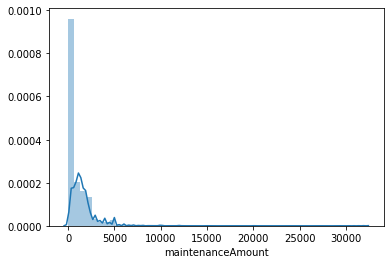

In [13]:
sns.distplot(data["maintenanceAmount"],kde=True)         
plt.show()

In [14]:
data['maintenanceAmount'] = data['maintenanceAmount'].astype(int)

In [15]:
data=data[(data['maintenanceAmount']>=0) & (data['maintenanceAmount']<3000)]

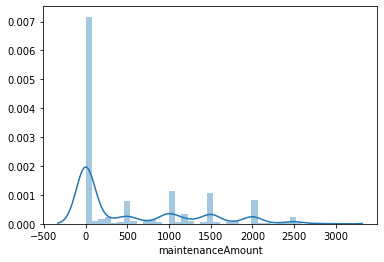

In [16]:
sns.distplot(data["maintenanceAmount"],kde=True)         
plt.show()

In [17]:
for i in range(0,3000,100):
    data.loc[(data['maintenanceAmount'] >= i) & (data['maintenanceAmount'] < i+100), 'maintenanceAmount'] = i

data['maintenanceAmt']=np.nan
data.loc[data['maintenanceAmount'] == 0, 'maintenanceAmt'] = data.loc[data['maintenanceAmount'] == 0, 'maintenanceAmt'].fillna('0')
data.loc[data['maintenanceAmount'] <= 1000, 'maintenanceAmt'] = data.loc[data['maintenanceAmount'] <= 1000, 'maintenanceAmt'].fillna('0-1000')
data.loc[data['maintenanceAmount'] <= 2000, 'maintenanceAmt'] = data.loc[data['maintenanceAmount'] <= 2000, 'maintenanceAmt'].fillna('1000-2000')
data.loc[data['maintenanceAmount'] <= 3000, 'maintenanceAmt'] = data.loc[data['maintenanceAmount'] <= 3000, 'maintenanceAmt'].fillna('2000-3000')
data.loc[data['maintenanceAmount'] > 3000, 'maintenanceAmt'] = data.loc[data['maintenanceAmount'] > 3000, 'maintenanceAmt'].fillna('3000+')



In [18]:
data['maintenanceAmount'].value_counts()

0       9696
1000    1524
1500    1429
2000    1129
500     1054
1200     478
2500     316
300      302
200      292
800      188
700      125
1800     124
1300     115
600      112
100      110
1600     105
1400      80
1700      74
400       71
1100      65
900       60
2200      45
2100      41
2400      39
2300      31
2800      23
2700      17
1900      16
2600      11
2900       7
Name: maintenanceAmount, dtype: int64

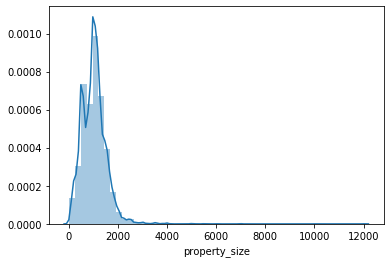

In [19]:
sns.distplot(data["property_size"],kde=True)         
plt.show()

In [20]:
data1=data[(data['property_size']>2000)]
data1.shape

(399, 19)

In [21]:
data=data[(data['property_size']>=100) & (data['property_size']<2000)]

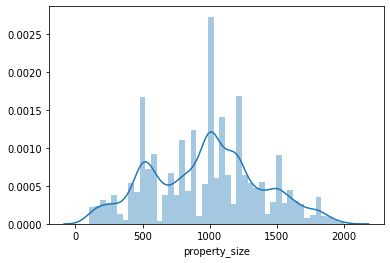

In [22]:
sns.distplot(data["property_size"],kde=True)         
plt.show()

In [23]:
for i in range(0,2000,100):
    data.loc[(data['property_size'] >= i) & (data['property_size'] < i+100), 'property_size'] = i

In [24]:
data['property_size'].value_counts()

1000    2511
500     1735
1200    1685
1100    1541
900     1313
800     1131
600      952
1500     871
1300     787
700      786
400      702
1400     645
1600     554
200      429
300      396
1800     352
100      344
1700     275
1900      95
Name: property_size, dtype: int64

In [25]:
data.drop(["deposit"],axis=1,inplace=True)

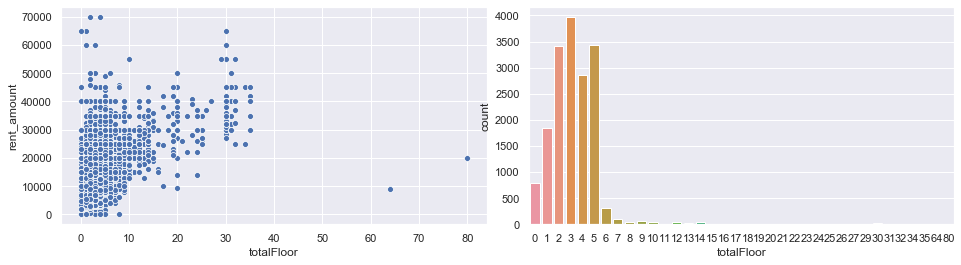

In [26]:
sns.set(rc={'figure.figsize':(16,4)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.1)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    if(i==1):
        sns.scatterplot(x="totalFloor",y='rent_amount', data=data)
    else:
        sns.countplot(x="totalFloor", data=data)

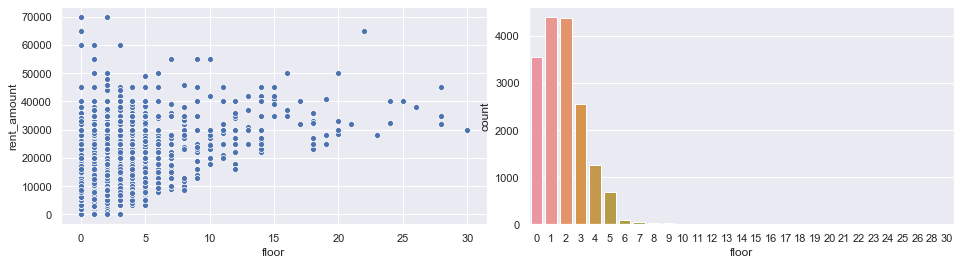

In [27]:
sns.set(rc={'figure.figsize':(16,4)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.1)
for i in range(1, 3):
    ax = fig.add_subplot(1, 2, i)
    if(i==1):
        sns.scatterplot(x="floor",y='rent_amount', data=data)
    else:
        sns.countplot(x="floor", data=data)

In [28]:
data['totalFloor'].value_counts()

3     3966
5     3435
2     3411
4     2865
1     1839
0      786
6      317
7       94
9       70
8       45
12      43
10      40
14      35
30      33
13      24
20      13
19      12
31      11
15       9
11       7
32       7
25       6
35       6
24       6
16       5
17       4
23       3
18       2
34       2
22       2
21       1
26       1
80       1
64       1
29       1
27       1
Name: totalFloor, dtype: int64

In [29]:
data['floor'].value_counts()

1     4400
2     4375
0     3553
3     2549
4     1261
5      688
6      100
7       40
8       23
9       20
11      14
12      13
14      13
10      11
13       7
18       6
15       5
20       4
19       4
28       4
24       3
16       3
17       2
30       1
22       1
26       1
21       1
25       1
23       1
Name: floor, dtype: int64

In [30]:
data['totalFloor'] = data['totalFloor'].astype(object)
data['floor'] = data['floor'].astype(object)

In [31]:
data['floor/totalFloor']=np.nan
data['floor/totalFloor'] = data.floor.astype(str).str.cat(data.totalFloor.astype(str),sep="/")

In [32]:
ll=data['floor/totalFloor'].value_counts()

In [33]:
less=[]
for key in ll.keys():
     if(ll[key]<=20):
            less.append(key)

In [34]:
len(less)

178

In [35]:
data = data[~data["floor/totalFloor"].isin(less)]

In [36]:
data['floor/totalFloor'].value_counts()

2/2    1500
2/3    1360
3/3    1177
1/2    1035
1/1     942
0/1     897
0/2     876
1/3     872
0/0     786
1/5     785
2/4     726
2/5     685
3/4     669
1/4     658
3/5     635
4/5     619
5/5     573
0/3     557
4/4     556
0/4     256
0/5     138
5/6      73
1/6      52
2/6      49
6/6      45
4/6      44
3/6      36
Name: floor/totalFloor, dtype: int64

In [37]:
data.shape

(16601, 19)

In [38]:
data=data[data['rent_amount']>0]

In [39]:
loc=data["locality"].value_counts()
len(loc)

2455

In [40]:
less=[]
for key in loc.keys():
     if(loc[key]<=1):
            less.append(key)

In [41]:
len(less)

1586

In [42]:
data = data[~data.locality.isin(less)]

In [43]:
data['locality']=data['locality'].str.upper()

In [44]:
data.locality = data.locality.str.strip()

In [45]:
df=pd.concat([data, data['locality'].str.split(', ', expand=True)], axis=1)

In [46]:
df.columns

Index([           'facing',             'floor',    'furnishingDesc',
                     'gym',     'isMaintenance',              'lift',
                'locality', 'maintenanceAmount',           'parking',
           'property_size',       'rent_amount',      'swimmingPool',
              'totalFloor',          'type_bhk',       'waterSupply',
            'property_age',           'Balcony',          'Bathroom',
        'floor/totalFloor',                   0,                   1,
                         2,                   3,                   4,
                         5,                   6],
      dtype='object')

In [47]:
for i in range(0,7):
    print(df[i].value_counts())

KUKATPALLY              1492
KONDAPUR                1064
MIYAPUR                  567
GACHIBOWLI               459
NIZAMPET                 453
                        ... 
NADARGUL                   2
BHAVANI NAGAR COLONY       2
RINEESH GARDENIA           2
VIDYUT NAGAR               2
L.B.NAGAR                  2
Name: 0, Length: 648, dtype: int64
KUKATPALLY                 45
MIYAPUR                    15
KONDAPUR                   10
MANIKONDA                   9
RAMACHANDRA PURAM           8
ALWAL                       7
MALKAJGIRI                  6
MOULA ALI                   6
LINGAMPALLY                 5
CHANDA NAGAR                5
QUTHBULLAPUR                5
NAGOLE                      5
KOTHAPET                    4
SERILINGAMPALLY             4
AMBERPET                    4
BEGUMPET                    4
HAFEEZPET                   4
PATANCHERU                  4
BANDLAGUDA JAGIR            3
ERRAGADDA                   3
KARKHANA                    3
ADITYA NAGAR    

In [48]:
df.shape

(15008, 26)

In [49]:
for i in range(1,3):
    df[0] = np.where((df[i].notnull()), df[i],  df[0]) 

In [50]:
df=df.loc[df[0] != 'TELANGANA']
df=df.loc[df[0] != 'HYDERABAD']

In [51]:
df.shape

(14981, 26)

In [52]:
df.drop([ 'locality', 1,2,3,4,5,6],axis=1,inplace=True)

In [53]:
df.shape

(14981, 19)

In [54]:
df.rename(columns={0: 'locality'}, inplace=True)

In [55]:
df.locality = df.locality.str.strip()

In [56]:
df['locality'].isna().sum()

6

In [57]:
df.shape

(14981, 19)

In [58]:
df.dropna(axis = 0, subset=['locality'], inplace = True)

In [59]:
df['locality'] = df['locality'].str.replace(" ","")

In [60]:
df['locality'].value_counts()

KUKATPALLY                                      1537
KONDAPUR                                        1076
MIYAPUR                                          582
CHANDANAGAR                                      468
GACHIBOWLI                                       461
                                                ... 
PARSIGUTTA                                         2
BANJARAHILLSROADNO-12                              2
PROFESSIONALTENNISACADEMY-CHALLENGER'STENNIS       2
REDDY'SAVENUENIZAMPET                              2
DURGAMCHERUVUMETROSTATION                          2
Name: locality, Length: 594, dtype: int64

In [61]:
df[(df['locality']=='KUKATPALLY')&(df['parking']=='BOTH')&(df['lift']==False)&(df['property_size']==1100)&(df['rent_amount']==18000)]

,facing,floor,furnishingDesc,gym,isMaintenance,lift,maintenanceAmount,parking,property_size,rent_amount,swimmingPool,totalFloor,type_bhk,waterSupply,property_age,Balcony,Bathroom,floor/totalFloor,locality
19,W,3,Semi,False,True,False,2000,BOTH,1100,18000,False,3,BHK2,CORP_BORE,5+,1,2,3/3,KUKATPALLY
8074,None,3,Semi,False,True,False,1500,BOTH,1100,18000,False,5,BHK2,None,0,0,2,3/5,KUKATPALLY


In [62]:
loc=df["locality"].value_counts()
len(loc)

594

In [63]:
less=[]
for key in loc.keys():
     if(loc[key]<=10):
            less.append(key)

In [64]:
len(less)

420

In [65]:
df = df[~df.locality.isin(less)]

In [66]:
df['locality'].value_counts()

KUKATPALLY       1537
KONDAPUR         1076
MIYAPUR           582
CHANDANAGAR       468
GACHIBOWLI        461
                 ... 
PRAGATINAGAR       11
BANDLAGUDA         11
CHINTALMET         11
NAMPALLY           11
HIMAYATHNAGAR      11
Name: locality, Length: 174, dtype: int64

In [67]:
df[df['locality']=='KUKATPALLY']

,facing,floor,furnishingDesc,gym,isMaintenance,lift,maintenanceAmount,parking,property_size,rent_amount,swimmingPool,totalFloor,type_bhk,waterSupply,property_age,Balcony,Bathroom,floor/totalFloor,locality
19,W,3,Semi,False,True,False,2000,BOTH,1100,18000,False,3,BHK2,CORP_BORE,5+,1,2,3/3,KUKATPALLY
34,E,3,Unfurnished,False,True,True,2000,BOTH,1000,15000,False,5,BHK2,CORP_BORE,1-5,1,2,3/5,KUKATPALLY
47,N,5,Semi,False,True,True,2000,BOTH,1200,18000,False,5,BHK3,CORP_BORE,0,1,2,5/5,KUKATPALLY
52,W,2,Semi,False,True,True,2100,BOTH,1100,18000,False,4,BHK2,CORP_BORE,1-5,2,2,2/4,KUKATPALLY
167,E,2,Full,False,False,False,0,BOTH,300,14000,False,3,RK1,CORP_BORE,1-5,1,1,2/3,KUKATPALLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19073,None,2,Unfurnished,False,False,False,0,TWO_WHEELER,500,7000,False,2,BHK1,None,1-5,0,1,2/2,KUKATPALLY
19074,None,0,Unfurnished,False,False,False,0,TWO_WHEELER,1000,11000,False,2,BHK2,None,1-5,0,2,0/2,KUKATPALLY
19075,SE,1,Semi,False,False,False,0,TWO_WHEELER,1000,14000,False,2,BHK2,None,5+,0,2,1/2,KUKATPALLY
19091,None,3,Unfurnished,False,True,False,1000,TWO_WHEELER,1000,12500,False,4,BHK2,None,1-5,0,2,3/4,KUKATPALLY


In [68]:
df.columns

Index(['facing', 'floor', 'furnishingDesc', 'gym', 'isMaintenance', 'lift',
       'maintenanceAmount', 'parking', 'property_size', 'rent_amount',
       'swimmingPool', 'totalFloor', 'type_bhk', 'waterSupply', 'property_age',
       'Balcony', 'Bathroom', 'floor/totalFloor', 'locality'],
      dtype='object')

In [69]:
df.drop(['floor','totalFloor'],axis=1,inplace=True)

In [70]:
loc=df["locality"].value_counts()
len(loc)

174

In [71]:
less=[]
for key in loc.keys():
     if(loc[key]<100):
            less.append(key)

In [72]:
len(less)

147

In [73]:
df=df.replace(to_replace =less,value ="other") 

In [74]:
df.columns

Index(['facing', 'furnishingDesc', 'gym', 'isMaintenance', 'lift',
       'maintenanceAmount', 'parking', 'property_size', 'rent_amount',
       'swimmingPool', 'type_bhk', 'waterSupply', 'property_age', 'Balcony',
       'Bathroom', 'floor/totalFloor', 'locality'],
      dtype='object')

In [75]:
df['maintenanceAmount'].unique()

array([1000,  500, 2000, 2700,    0,  800, 2100,  700, 1200, 2500, 1500,
       2400, 1800, 1600, 2200,  200,  300, 1100, 1400, 1700, 1300, 2800,
        100,  600, 2600,  900,  400, 2300, 1900, 2900])

In [76]:
df['property_size']=df['property_size'].astype(object)
df['maintenanceAmount']=df['maintenanceAmount'].astype(object)

In [77]:
list_of_dict = list()
count_value = ['parking', 'furnishingDesc', 'type_bhk',
              'facing','waterSupply', 'property_age',
               'Balcony', 'Bathroom',
               'floor/totalFloor','locality','maintenanceAmount','property_size']
for value in count_value:
    temp = df.groupby(value)['rent_amount'].mean()
    temp = temp.to_frame()
    temp = temp.sort_values(by='rent_amount',ascending=False)
    temp_dict = dict()
    j = temp.shape[0]
    for i in range(temp.shape[0]):
        temp_dict[temp.index[i]] = j
        j = j - 1        

    list_of_dict.append(temp_dict)  
    #print(temp.iloc[:,0])
    #print(temp)
    print("*"*10)

**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********


In [78]:
print(list_of_dict)

[{'FOUR_WHEELER': 4, 'BOTH': 3, 'TWO_WHEELER': 2, 'NONE': 1}, {'Full': 3, 'Semi': 2, 'Unfurnished': 1}, {'BHK4PLUS': 6, 'BHK4': 5, 'BHK3': 4, 'BHK2': 3, 'BHK1': 2, 'RK1': 1}, {'W': 10, 'SE': 9, 'S': 8, 'NE': 7, 'E': 6, 'SW': 5, 'DK': 4, 'N': 3, 'NW': 2, 'None': 1}, {'CORP_BORE': 4, 'BOREWELL': 3, 'CORPORATION': 2, 'None': 1}, {'0': 3, '1-5': 2, '5+': 1}, {'4': 6, '3': 5, '2': 4, '4+': 3, '1': 2, '0': 1}, {'5+': 5, '4': 4, '3': 3, '2': 2, '1': 1}, {'4/6': 27, '5/6': 26, '2/6': 25, '4/5': 24, '1/6': 23, '1/5': 22, '2/5': 21, '3/5': 20, '5/5': 19, '3/6': 18, '6/6': 17, '1/4': 16, '2/4': 15, '0/5': 14, '3/4': 13, '4/4': 12, '0/4': 11, '1/3': 10, '0/3': 9, '2/3': 8, '1/2': 7, '3/3': 6, '1/1': 5, '2/2': 4, '0/1': 3, '0/2': 2, '0/0': 1}, {'BANJARAHILLS': 28, 'MADHAPUR': 27, 'KONDAPUR': 26, 'GACHIBOWLI': 25, 'MANIKONDA': 24, 'TOLICHOWKI': 23, 'MEHDIPATNAM': 22, 'SHAIKPET': 21, 'SERILINGAMPALLY': 20, 'BEGUMPET': 19, 'MIYAPUR': 18, 'PRAGATHINAGAR': 17, 'KUKATPALLY': 16, 'NIZAMPET': 15, 'CHANDANA

['furnishingDesc', 'isMaintenance', 'lift', 'maintenanceAmount',
       'parking', 'property_size', 'rent_amount', 'type_bhk', 'waterSupply',
       'Balcony', 'Bathroom', 'floor/totalFloor', 'locality']

In [79]:
[1,False,False,17,4,12,3,2,2,2,16,27]

[1, False, False, 17, 4, 12, 3, 2, 2, 2, 16, 27]

In [80]:
len(list_of_dict)

12

In [81]:
df[count_value[0]] = df[count_value[0]].map(list_of_dict[0])
df[count_value[1]] = df[count_value[1]].map(list_of_dict[1])
df[count_value[2]] = df[count_value[2]].map(list_of_dict[2])
df[count_value[3]] = df[count_value[3]].map(list_of_dict[3])
df[count_value[4]] = df[count_value[4]].map(list_of_dict[4])
df[count_value[5]] = df[count_value[5]].map(list_of_dict[5])
df[count_value[6]] = df[count_value[6]].map(list_of_dict[6])
df[count_value[7]] = df[count_value[7]].map(list_of_dict[7])
df[count_value[8]] = df[count_value[8]].map(list_of_dict[8])
df[count_value[9]] = df[count_value[9]].map(list_of_dict[9])
df[count_value[10]] = df[count_value[10]].map(list_of_dict[10])
df[count_value[11]] = df[count_value[11]].map(list_of_dict[11])

In [82]:
data_copy_corr = df.corr()
data_copy_corr = data_copy_corr['rent_amount']
data_copy_corr

facing               0.162902
furnishingDesc       0.491543
gym                  0.171656
isMaintenance        0.318014
lift                 0.398388
maintenanceAmount    0.539616
parking              0.420760
property_size        0.688962
rent_amount          1.000000
swimmingPool         0.160507
type_bhk             0.681436
waterSupply          0.130774
property_age         0.029120
Balcony              0.270202
Bathroom             0.644565
floor/totalFloor     0.463846
locality             0.356135
Name: rent_amount, dtype: float64

In [83]:
df['property_size'].value_counts()

10    2008
5     1477
12    1277
11    1210
9     1015
8      915
6      766
15     700
7      623
13     572
4      567
14     484
16     429
2      357
3      327
1      287
17     230
18     200
19      56
Name: property_size, dtype: int64

In [84]:
dddd

NameError: name 'dddd' is not defined

In [85]:
df.to_csv('new1.csv', index=False)  

In [ ]:
ll=[]
ll=df.columns
z=df.head(1)

In [ ]:
df.head()

In [ ]:
p=[]
for i in ll:
    print(z[i].unique())

In [ ]:
p

In [ ]:
for i in range(100,5000,100):
    data.loc[(data['maintenanceAmount'] >= i) & (data['maintenanceAmount'] < i+100), 'maintenanceAmount'] = i